### Load LinearRegression libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score, r2_score
from matplotlib import pyplot as plt
%matplotlib inline

### Set up hyperparameters for selection

In [2]:
alphas = [5, 0.5, 0.05, 0.005,0.0000005]
models = dict()
for alpha in alphas:
    descriptor = 'alpha:{}'.format(alpha)
    models[descriptor] = linear_model.Ridge(alpha=alpha)

### Load randomly selected train/test set 

In [3]:
def load_data_sets(filename):
    filenames = ('{}_{}.pickle'.format(filename, _) for _ in ('train_data', 'train_target', 'test_data', 'test_target'))    
    return [pd.read_pickle(_) for _ in filenames]


train_data, train_target, test_data, test_target = load_data_sets('usfd_additional_onehot_random_20')

In [4]:
columns = train_data.columns
for column in columns:
    mean = train_data[column].mean()
    std = train_data[column].std()
    train_data[column] = train_data.apply(lambda _: (_[column]-mean)/std if std>0 else _[column]-mean, axis=1)
    test_data[column] = test_data.apply(lambda _: (_[column]-mean)/std if std>0 else _[column]-mean, axis=1)
    

In [5]:
for column1 in columns:
    for column2 in columns:
        train_data[column1+column2] = train_data.apply(lambda _: _[column1]*_[column2], axis=1)   
        test_data[column1+column2] = test_data.apply(lambda _: _[column1]*_[column2], axis=1)

### For all hyperparameters, fit model to data and predict on training and test set

In [6]:
predictions_test = dict()
predictions_train = dict()
for descriptor, model in models.items():
    print('Training model {}'.format(descriptor))
    model.fit(np.asarray(train_data), np.asarray(train_target).ravel())
    predictions_test[descriptor] = model.predict(test_data)
    predictions_train[descriptor] = model.predict(train_data)



Training model alpha:5
Training model alpha:0.05
Training model alpha:0.005
Training model alpha:5e-07
Training model alpha:0.5


R2 score:
 alpha:0.005 : 0.8144625953263607
 alpha:0.05 : 0.8144550508651456
 alpha:0.5 : 0.8144095554906433
 alpha:5 : 0.8136733888097192
 alpha:5e-07 : 0.814464173349366


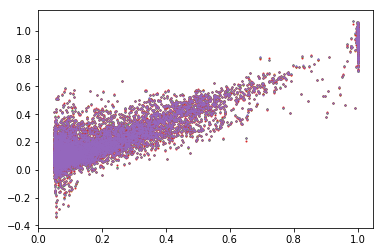

In [7]:
print('R2 score:')
for descriptor in sorted(models.keys()):
    plt.scatter(x=train_target, y=predictions_train[descriptor], marker='o', s=1)
    print(' {} : {}'
      .format(descriptor, r2_score(train_target, predictions_train[descriptor])))

R2 score:
 alpha:0.005 : 0.7811477265755038
 alpha:0.05 : 0.7812670245084273
 alpha:0.5 : 0.7820219590179537
 alpha:5 : 0.7838240634699699
 alpha:5e-07 : 0.7811315730001629


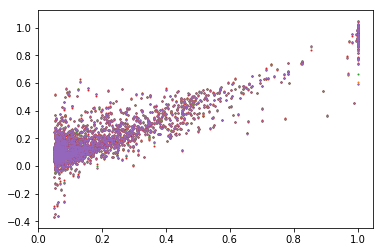

In [8]:
print('R2 score:')
for descriptor in sorted(models.keys()):
    plt.scatter(test_target, predictions_test[descriptor], marker='o',s=1)
    print(' {} : {}'
      .format(descriptor, r2_score(test_target, predictions_test[descriptor])))